In [158]:
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
iris=load_iris()
data=iris.data
label=iris.target

In [183]:
def culc_dist(target_data,centroid):#距離の計算
    dist_holder=(target_data-centroid)**2
    distance=np.sqrt(np.sum(dist_holder,axis=1))
    n_cluster=np.argmin(distance)
    SSE=np.sum(dist_holder[n_cluster])
    return n_cluster,SSE
class kmeans:
    def __init__(self,K,max_iter=100):#クラスターの数と、最大学習回数の初期化関数
        if K < 2 or not(isinstance(K,int)):#Kは、学習回数2以上でかつ整数
            raise ValueError("クラスター数に不適切な値が入力されています")
        else:
            self.K=K

        if not(isinstance(max_iter,int)):#学習回数は、整数
            raise ValueError("学習回数に不適切な値が入力されています。")
        else:
            self.max_iter=max_iter
    
    def fit(self, X, y=None):#学習データのセット関数
        self.X=X
        y=np.zeros(self.X.shape[0])
        self.y=y
        self.n_feature=X.shape[1]
        self.centroids=np.zeros([self.K , self.n_feature])
        for feature_index in range(self.n_feature):
            data_range=np.max(data[:,feature_index])-np.min(data[:,feature_index])
            data_width=data_range/self.K
            data_min=np.min(data[:,feature_index])
            data_max=data_width+data_min
            for cent_index in range(len(self.centroids)):
                np.random.seed(123)
                self.centroids[cent_index,feature_index]=np.random.uniform(data_min,data_max)
                data_min+=data_width
                data_max+=data_width
        self.new_centroids=np.zeros([self.K , self.n_feature])
        self.SSE=0

    def cluster_learn(self):#学習開始関数
        for iter in range(self.max_iter):#学習回数分ループ
            self.SSE=0
            for data_index in range(self.X.shape[0]):#データの個数分ループ
                result=culc_dist(self.X[data_index],self.centroids)
                self.y[data_index]=result[0]
                self.SSE+=result[1]
            for label_num in range(self.K):#クラスター数分ループ
                k_mask=(self.y==label_num)
                masking_data=self.X[k_mask]
                for feature in range(self.n_feature):#データの数分ループ
                    self.new_centroids[label_num,feature]=np.mean(masking_data[:,feature])
            if (self.centroids==self.new_centroids).all():
                return self.new_centroids , self.y , self.SSE
            else:
                self.centroids=self.new_centroids
        return  self.new_centroids , self.y , self.SSE


In [184]:
a=kmeans(2)
a.fit(data)
s=a.cluster_learn()

In [187]:
print(result.cluster_centers_)
print(result.labels_)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [190]:
data_df = pd.DataFrame(data)
label_df = pd.DataFrame(s[1])
sample_df = pd.concat([data_df,label_df],axis=1)
sample_df.columns=["sepal_length","sepal_width","petal_length","petal_width","label"]
sample_df


,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1.0
146,6.3,2.5,5.0,1.9,1.0
147,6.5,3.0,5.2,2.0,1.0
148,6.2,3.4,5.4,2.3,1.0


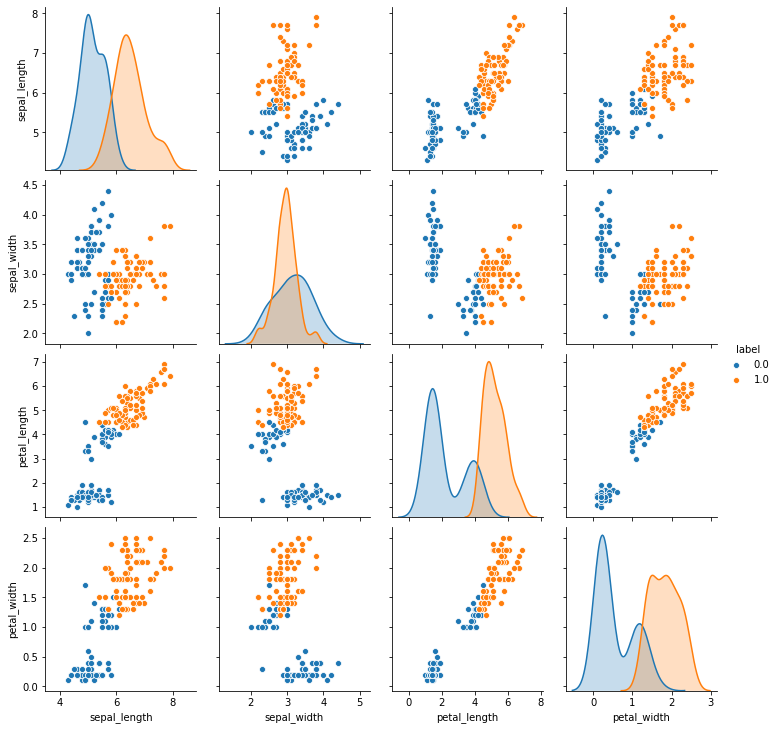

In [191]:
sns.pairplot(sample_df,hue="label")

In [193]:
bar_left=[]
bar_height=[]
for x in range(2,6):
    a=kmeans(x)
    a.fit(data)
    ans=a.cluster_learn()
    bar_left.append(x)
    bar_height.append(ans[2])

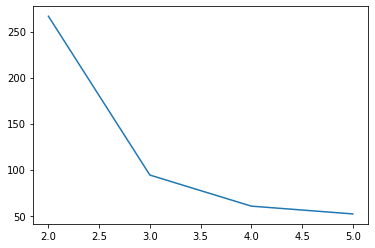

In [194]:
plt.plot(bar_left,bar_height)

In [186]:
result=KMeans(n_clusters=3,random_state=10).fit(data)